# In-Sample Estimation of Prediction Error

*true population relationship* `Y = f(X) + E`

*using data we build approximation* `Y ~ fhat(X)`

Prediction Error:
In the context of regression, there are 2 popular ways to calcualte or establish what the prediction error us.

1. **Squared Error**:

Squared error is basically the true value minus the predicted value raised to th epower 2.

`(Y - fhat(X))^2`

2. **Absolute Deviation**:

How far away in an absolute sense.

`|y - fhat(X)|`

In the context of linear regression, we use `squared Error` because we can differntiate and calculate the coefficients present inside the function `fhat`.

# **Train Test Validation Split**

It is called `in sample estimation of prediction error` because everything happens within the sample.

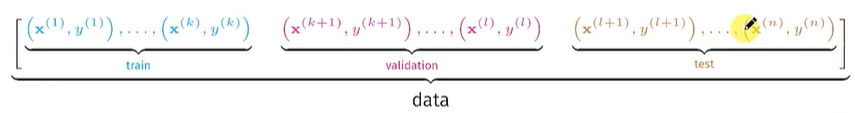

We are going to use the idea of splitting the data into train, validationa dn test parts to calculate or estimate what the prediction error would be.

1. We will build different models (`fhat`) using **training data** and see which model generalizes well or have the samallest prediction error on new unseen data.

2. We estimate the prediction error for different models and pick the best one using **validation data** (Here, we calcualte the MSE)

3. Finally, we assess the best models's performance using the **test data**.

### Why do we need the Validation part?

Validation helps us decide between different types of models that we can potentially build from the training data.

- The validation data is used to estimate the generalization error of the different models and choose the best one.

### Calculating estimated generalization error for each fitted model `fhat` as:

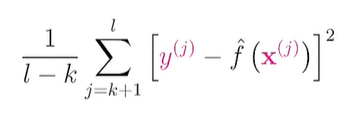

- We will then choose the model `fhatbest` with the smallest estimated generalization error (among `fhat1` `fhat2` `fhat3` ..... `fhat10`).

### Then, why do we need the test data as we alreadyt have `fhatbest`?

During validation we have built a large number of models and calculated the MSE on the validation part of the dataset. It turns out that the MSE for our best models happens to be an underestimate of the true generalization error of the best model.

Therefore, we use the test data to calcualte an unbiased estimate of the true generalization error of the best model.

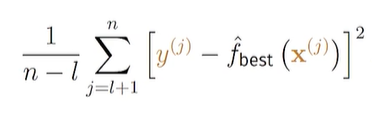




The single number we get from here is a measure of the generalization error of the best model on new unseen data.

### Linear Regression Example
- We will simulate a dataset with 100 samples:


```
750 train (75%)
150 validation (15%)
100 test (10%)
```

The population model that we will simulate is


```
Y = 1 + 2X1 + 9X2 + E
```

where, `X1` and `X2` are independent and standard normal random variables (mean 0, standard deviation 1) and `E`~ N(0, 5)



In [1]:
install.packages(c("ggplot2", "dplyr"))
library(ggplot2)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Simulating population model

In [2]:
nsamples = 1000
x_1 = rnorm(nsamples, mean = 0, sd = 1)
x_2 = rnorm(nsamples, mean = 0, sd = 1)
epsilon = rnorm(nsamples, mean = 0, sd = 5)

# Population model
y = 1+2*x_1+9*x_2+epsilon
popData = data.frame(x_1, x_2, y)
colnames(popData) = c('X_1', 'X_2', 'Y')

In [6]:
head(popData)

,X_1,X_2,Y
,<dbl>,<dbl>,<dbl>
1,-0.4625190,0.3393840,6.181061
2,1.0796533,-0.4745949,-6.106294
3,-1.1207727,-0.4407120,2.755293
4,-0.8846207,1.2816883,10.677597
5,0.6246532,-1.4358855,-5.283532
6,-0.3896380,2.2877625,18.290708


In [3]:
# Splitting data into train (75%), validation (15%), and test (10%) sets
set.seed(0)
split = c(train = 0.75, validation = 0.15, test = 0.1)
ind = sample(cut(seq(nsamples), nsamples*cumsum(c(0, split)), labels = names(split)))

In [4]:
popDataTrain = popData[ind == 'train', ]
popDataValidation = popData[ind == 'validation', ]
popDataTest = popData[ind == 'test', ]

In [7]:
# Building using training data the model Y ~ X_1
model = lm(data = popDataTrain, Y ~ X_1)

In [12]:
# Calculate RMSE (root-mean-squared-error) on train data
train_error = sqrt(mean((popDataTrain$Y - predict(model, popDataTrain))^2))

In [13]:
# Calculate RMSE (root-mean-squared-error) on validation data
validation_error = sqrt(mean((popDataValidation$Y - predict(model, popDataValidation))^2))

# Calculate RMSE (root-mean-squared-error) on test data
test_error = sqrt(mean((popDataTest$Y - predict(model, popDataTest))^2))

cat(sprintf('Train error = %f, Validation error = %f, Test error = %f\n', train_error, validation_error, test_error))

Train error = 10.492579, Validation error = 11.023389, Test error = 10.177474


In [15]:
summary(model)


Call:
lm(formula = Y ~ X_1, data = popDataTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.198  -6.927  -0.027   6.889  34.022 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.8641     0.3843   2.248   0.0248 *  
X_1           1.8623     0.4080   4.565 5.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.51 on 748 degrees of freedom
Multiple R-squared:  0.0271,	Adjusted R-squared:  0.0258 
F-statistic: 20.84 on 1 and 748 DF,  p-value: 5.85e-06


The model is not good at all.

----

Lets see with X_2

In [17]:
# Building using training data the model Y ~ X_2
model = lm(data = popDataTrain, Y ~ X_2)

In [18]:
# Calculate RMSE (root-mean-squared-error) on validation data
validation_error = sqrt(mean((popDataValidation$Y - predict(model, popDataValidation))^2))

# Calculate RMSE (root-mean-squared-error) on test data
test_error = sqrt(mean((popDataTest$Y - predict(model, popDataTest))^2))

cat(sprintf('Train error = %f, Validation error = %f, Test error = %f\n', train_error, validation_error, test_error))

Train error = 10.492579, Validation error = 4.984268, Test error = 4.509097


In [19]:
summary(model)


Call:
lm(formula = Y ~ X_2, data = popDataTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.6035  -3.3287   0.1277   3.4937  16.9612 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2163     0.1893   6.427 2.32e-10 ***
X_2           9.1491     0.1860  49.184  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.177 on 748 degrees of freedom
Multiple R-squared:  0.7638,	Adjusted R-squared:  0.7635 
F-statistic:  2419 on 1 and 748 DF,  p-value: < 2.2e-16


Let's regress on both X_1 and X_2

In [20]:
# Building using training data the model Y ~ X_1 + X_2
model = lm(data = popDataTrain, Y ~ X_1 + X_2)

In [21]:
# Calculate RMSE (root-mean-squared-error) on validation data
validation_error = sqrt(mean((popDataValidation$Y - predict(model, popDataValidation))^2))

# Calculate RMSE (root-mean-squared-error) on test data
test_error = sqrt(mean((popDataTest$Y - predict(model, popDataTest))^2))

cat(sprintf('Train error = %f, Validation error = %f, Test error = %f\n', train_error, validation_error, test_error))

summary(model)

Train error = 10.492579, Validation error = 4.710195, Test error = 4.472231



Call:
lm(formula = Y ~ X_1 + X_2, data = popDataTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.477  -3.311   0.013   3.224  14.845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3179     0.1785   7.382 4.15e-13 ***
X_1           1.8596     0.1893   9.824  < 2e-16 ***
X_2           9.1486     0.1752  52.227  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.875 on 747 degrees of freedom
Multiple R-squared:  0.7908,	Adjusted R-squared:  0.7903 
F-statistic:  1412 on 2 and 747 DF,  p-value: < 2.2e-16


We can see that the adjusted R-squared has increase and validation error has also decreased.

We can also see that the p-values for both of them are significant and the coefficientfor both of them is close to 2 and 9 respectively.

-------

Now, lets introduce some non-linearity.


In [22]:
# Building using training data the model Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2)
model = lm(data = popDataTrain, Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2))

In [23]:
# Calculate RMSE (root-mean-squared-error) on validation data
validation_error = sqrt(mean((popDataValidation$Y - predict(model, popDataValidation))^2))

# Calculate RMSE (root-mean-squared-error) on test data
test_error = sqrt(mean((popDataTest$Y - predict(model, popDataTest))^2))

cat(sprintf('Train error = %f, Validation error = %f, Test error = %f\n', train_error, validation_error, test_error))

summary(model)

Train error = 10.492579, Validation error = 4.690692, Test error = 4.456141



Call:
lm(formula = Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2), data = popDataTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.566  -3.350   0.041   3.163  14.838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.39478    0.25270   5.520 4.69e-08 ***
X_1          1.84609    0.18996   9.718  < 2e-16 ***
X_2          9.15592    0.17553  52.160  < 2e-16 ***
I(X_1^2)    -0.13010    0.13998  -0.929    0.353    
I(X_2^2)     0.03687    0.12317   0.299    0.765    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.878 on 745 degrees of freedom
Multiple R-squared:  0.7911,	Adjusted R-squared:   0.79 
F-statistic: 705.4 on 4 and 745 DF,  p-value: < 2.2e-16


While the validation error is kind of similar to what we had corresponded to the model where X_1 and X_2 are the only predictors, we can see that the adjusted R-squared has gone down where as the true R-squared or multiple R-squared is actually increasing.

Therefore, we are not adding useful predictors.

In [24]:
# Build using training data the model Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2) + I(X_1^3) + I(X_2^3)
model = lm(data = popDataTrain, Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2) + I(X_1^3) + I(X_2^3))

In [25]:
# Calculate RMSE (root-mean-squared-error) on validation data
validation_error = sqrt(mean((popDataValidation$Y - predict(model, popDataValidation))^2))

# Calculate RMSE (root-mean-squared-error) on test data
test_error = sqrt(mean((popDataTest$Y - predict(model, popDataTest))^2))

cat(sprintf('Train error = %f, Validation error = %f, Test error = %f\n', train_error, validation_error, test_error))

summary(model)

Train error = 10.492579, Validation error = 4.706972, Test error = 4.463971



Call:
lm(formula = Y ~ X_1 + X_2 + I(X_1^2) + I(X_2^2) + I(X_1^3) + 
    I(X_2^3), data = popDataTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.585  -3.353   0.026   3.175  14.819 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.40588    0.25382   5.539 4.23e-08 ***
X_1          1.89159    0.31414   6.021 2.72e-09 ***
X_2          8.96801    0.28983  30.942  < 2e-16 ***
I(X_1^2)    -0.13434    0.14132  -0.951    0.342    
I(X_2^2)     0.02793    0.12376   0.226    0.821    
I(X_1^3)    -0.01610    0.09239  -0.174    0.862    
I(X_2^3)     0.06093    0.07500   0.812    0.417    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.883 on 743 degrees of freedom
Multiple R-squared:  0.7913,	Adjusted R-squared:  0.7896 
F-statistic: 469.5 on 6 and 743 DF,  p-value: < 2.2e-16


Lets build a model using interaction term.

In [26]:
# Building using training data the model Y ~ X_1 + X_2 + X_1:X_2
model = lm(data = popDataTrain, Y ~ X_1 + X_2 + X_1:X_2)

In [27]:
# Calculate RMSE (root-mean-squared-error) on validation data
validation_error = sqrt(mean((popDataValidation$Y - predict(model, popDataValidation))^2))

# Calculate RMSE (root-mean-squared-error) on test data
test_error = sqrt(mean((popDataTest$Y - predict(model, popDataTest))^2))

cat(sprintf('Train error = %f, Validation error = %f, Test error = %f\n', train_error, validation_error, test_error))

summary(model)

Train error = 10.492579, Validation error = 4.718211, Test error = 4.474207



Call:
lm(formula = Y ~ X_1 + X_2 + X_1:X_2, data = popDataTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3824  -3.3020   0.0301   3.1875  14.6970 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.31810    0.17861   7.380 4.24e-13 ***
X_1          1.85929    0.18940   9.817  < 2e-16 ***
X_2          9.14854    0.17527  52.197  < 2e-16 ***
X_1:X_2     -0.07921    0.18870  -0.420    0.675    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.878 on 746 degrees of freedom
Multiple R-squared:  0.7909,	Adjusted R-squared:   0.79 
F-statistic: 940.5 on 3 and 746 DF,  p-value: < 2.2e-16


So we see the same idications as we build all these 5 models using the same training data.
- We applied all these models on the validation part of the dataset to get 5 differnt generalization error
- We then chosse the one with the smallest generalization error.

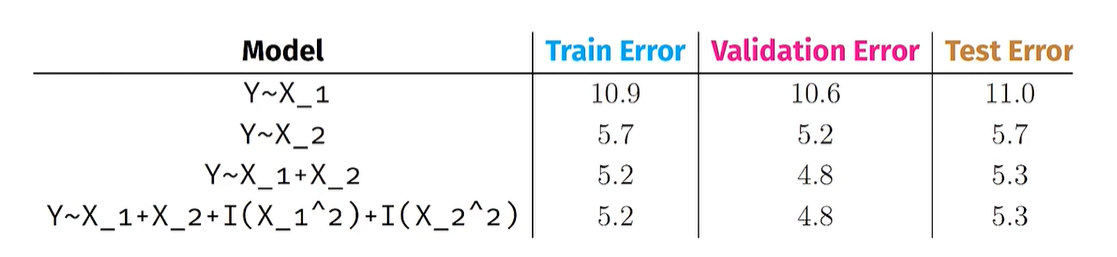

Here, we choose the samllest validation error and also which has the smallest numbers of predictors as our best model.
- Then we calculate the best model to the test part of the dataset.
- And as we can see `5.3` will be a measure of the expected generalization error on unseen data.